# **Week 8 - Gradient Boosting**

Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error. How are the targets calculated? The target outcome for each case in the data depends on how much changing that case's prediction impacts the overall prediction error

# **What is the difference between Bagging and Bossting**

### **Bagging**

Bagging is used when the goal is to reduce the variance of a decision tree classifier. Here the objective is to create several subsets of data from training sample chosen randomly with replacement. Each collection of subset data is used to train their decision trees. As a result, we get an ensemble of different models. Average of all the predictions from different trees are used which is more robust than a single decision tree classifier.

### **Boosting**

Boosting is used to create a collection of predictors. In this technique, learners are learned sequentially with early learners fitting simple models to the data and then analysing data for errors. Consecutive trees (random sample) are fit and at every step, the goal is to improve the accuracy from the prior tree. When an input is misclassified by a hypothesis, its weight is increased so that next hypothesis is more likely to classify it correctly. This process converts weak learners into better performing model.

**For more detailed comparison click [here](https://analyticsindiamag.com/primer-ensemble-learning-bagging-boosting/#:~:text=Bagging%20is%20a%20way%20to,based%20on%20the%20last%20classification.)**

### **Dataset**

We have taken the bank churn data which is present on Kaggle
Dataset .We have considered only some columns for this notebook

To access the data click [here](https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers):


In [1]:
import pandas as pd 
import warnings
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
df_train=pd.read_csv("data/Churn_Modelling.csv")

In [3]:
df_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df_train.drop(columns=['CustomerId','Surname'],inplace=True)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### **Data Visulaization**

Now we will do some visualization stuff to get some idea about our dataset. There are many libraries for visualization available in python like matplotlib, plotly etc. In this we tutorial we will be using seaborn.
You can learn about seabron library from below links

- [Geek For Geeks](https://www.geeksforgeeks.org/seaborn-categorical-plots/)

- [Medium](https://medium.com/analytics-vidhya/categorical-plots-in-seaborn-748a5b291679)



**<h3> Count Plots**

Count Plots help with the frequency of the data.



**<h3> Studying, Exited ,Genderwise**


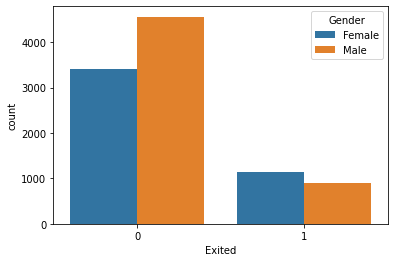

In [7]:
sns.countplot(x= df_train['Exited'],hue=df_train['Gender'])

From the above graph we can interpret that Male members seem to stick with their card and females seem to exit more.

**<h3> Studying , Exited, on the basis of whether the person has a credit card or not**

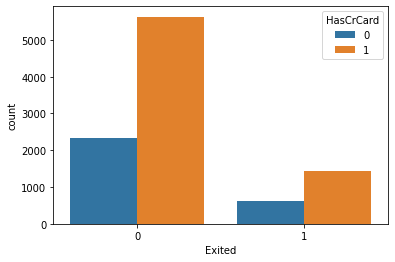

In [8]:
sns.countplot(x= df_train['Exited'],hue=df_train['HasCrCard'])

**<h3> Studying , Exited, on the basis of whether the person is an active member or not**

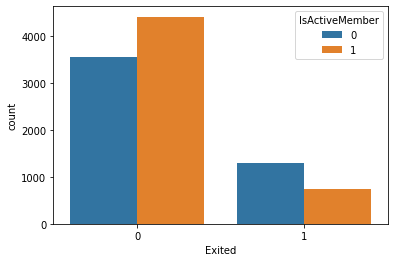

In [9]:
sns.countplot(x=df_train['Exited'],hue=df_train['IsActiveMember'])

**<h3>Categorical variables**

To deal with categorical varibles we will use the Label Encoder

In [10]:
df_train['Gender'] = LabelEncoder().fit_transform(df_train['Gender'])
df_train['Geography'] = LabelEncoder().fit_transform(df_train['Geography'])
df_train.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,850,2,0,43,2,125510.82,1,1,1,79084.10,0


**<h3> Normalizing Data using Standar Scaler**

We will normalize the data using Standard Scaler. By following the given [link](https://stackoverflow.com/questions/38420847/apply-standardscaler-to-parts-of-a-data-set) you can get an idea about the implementation of the Standard Scaler library.

In [11]:
scol=[]
for i in df_train.columns:
    scol.append(i)

In [12]:
sc=StandardScaler()
scaled_features=df_train.copy()
features = scaled_features[scol]
scaler = StandardScaler().fit(features.values)

In [13]:
features=scaler.transform(features.values)
scaled_features[scol]=features

In [14]:
scaled_features.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-1.731878,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165
1,-1.731531,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775
2,-1.731185,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165
3,-1.730838,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775
4,-1.730492,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775


In [15]:
X=scaled_features.iloc[:,:-1]
y=df_train.iloc[:,-1]

In [16]:
X.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-1.731878,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-1.731531,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.731185,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,-1.730838,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,-1.730492,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276


In [17]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

**<h3>Splitting into Training and Testing sets**

In [18]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


**<h3> Implementing Logistic Regression Model**

In [20]:
clf =LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [21]:
yp=clf.predict(X_test)

In [22]:
accuracy_score(y_test,yp)

0.798

In [23]:
f1_score(y_test,yp)

0.2230769230769231

As you can see the F1 score is pretty less. Let's boost it !

**<h3> Implementing AdaBoost**

In [24]:
adaclf =AdaBoostClassifier()
adaclf.fit(X_train,y_train)
yada=adaclf.predict(X_test)

In [25]:
accuracy_score(y_test,yada)

0.857

In [26]:
f1_score(yada,y_test)

0.5818713450292398

As you can see the F1 score has increased.Let's try another Boosting Algorithm.

**<h3>Implementing Gradient Boost**

You can learn more about Gradient Boosting from [here](https://mlcourse.ai/articles/topic10-boosting/)


In [27]:
gbclf=GradientBoostingClassifier()
gbclf.fit(X_train,y_train)
ypg= gbclf.predict(X_test)

In [28]:
accuracy_score(y_test,ypg)

0.868

In [29]:
f1_score(y_test,ypg)

0.5987841945288752

**<h3>Implementing XGBOOST**

In [30]:
!pip install xgboost

/usr/bin/sh: 1: pip: not found


To learn more about XGboost [Click here](https://medium.com/@gabrieltseng/gradient-boosting-and-xgboost-c306c1bcfaf5)

In [31]:
D_train =xgb.DMatrix(X_train,label=y_train)
D_test =xgb.DMatrix(X_test,label=y_test)

In [32]:
param ={
    'eta':0.3,
    'max_depth':3,
    'num_class':2
}
steps=20

In [33]:
xgbmodel = xgb.train(param,D_train,steps)
yxgb=xgbmodel.predict(D_test)

In [34]:
accuracy_score(yxgb,y_test)

0.8615

In [35]:
f1_score(y_test,yxgb)

0.5705426356589148

Our F1 score has increased.

**<h2> Congratulations on completing the Machine Learning Track!**

We , at 100daysofML , feel extremely proud to have been a part of your growth. Keep Growing and Keep Coding!